In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
from fun_choices import *
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()

In [2]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()
        

def choice_lr(net,s,s0,L):
    if net =='lcn' or net=='lcn_shared' or net=='fcn2':
        if s>2:
            lr = .003
        else:
            if s0<4:
                lr = 0.01
            else:
                lr = 0.003
    elif net=="cnn2" or net=='cnn2_shared' or net=='cnn2-hom':
        if s>2:
            if s0<4:
                lr = 0.01
            elif s0==4:
                lr = 0.003
            elif s0==6:
                lr = 0.0003

        else:
            if s0>0:
                if L>=3:
                    if s0<4:
                        lr = 0.01
                    elif s0==4:
                        lr = 0.003
                    else:
                        lr = 0.001
                elif L==2:
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    else:
                        lr = 0.01
            else:
                lr = 0.01
            if L==1:
                if s0<4:
                    lr = 0.1
                else:
                    lr = .03
    return lr

def training_point(net,s,s0,L,n,m):
    if net=='lcn' or net=='lcn_shared':
        if s==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx1= np.logspace(np.log10(int(200*p_pred)),np.log10(650*p_pred),5)
                xx = np.concatenate((xx,xx1))
                #xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        if s>2:
            p_pred = ((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(100*p_pred),10)
            xx = np.concatenate((xx,xx1))
    elif  net=='fcn2':
        if s==2 and L==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        elif s==2 and L==3:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(400*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(600*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        elif s>2:
            p_pred = m**(L) #((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(50*p_pred),7)
            xx = np.concatenate((xx,xx1))
    else:
        if s>2: 
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <=4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(100*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))

            if s==3 or s==4:
                if L==2:
                    xx1= np.logspace(np.log10(100*p_pred),np.log10(500*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(500*p_pred),np.log10(1000*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                if s==4:
                    xx1= np.logspace(np.log10(1000*p_pred),np.log10(2000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(2000*p_pred),np.log10(10000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(10000*p_pred),np.log10(50000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                if s==3 and s0==4:
                    xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(10000*p_pred),10)
                    xx = np.concatenate((xx,xx1))
        else:
            p_pred = n**(L+1)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            if L>1:
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                        
                        xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                        xx0 = xx0[:-1]
                        xx = np.concatenate((xx0,xx))
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
            else:
                p_pred_1 = n**L
                if s0 <4:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                else:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
            if s==3:
                p_pred = (s0+1)*m**(L)
                #p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0 <= 4:
                    #xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(2000*p_pred),10)
                    #xx = np.concatenate((xx,xx1))
                    xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),15)
            xx =xx[:-1]
    return xx

def load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=0,type_diffeo='A'):
    if type_diffeo=='B':
        #print("hier1_w_0_"+net+"_B_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        #if net =='lcn':
        #    tmp = load_file("lcn_diffeoB/hier1_w_0_"+net+"_B_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        #elif net =='cnn2':
        tmp = load_file("cnn_diffeoB/hier1_w_0_"+net+"_B_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

        #print('ok')
    else:
        if net=='lcn_shared':
            #print("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            tmp = load_file("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        if net=='cnn2_shared':
             
            tmp = load_file("cnn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            print('ok')
            
        if net=='lcn':
            if s>2:
                #net+"_data_L"+str(2)+"_A_0s
                tmp = load_file("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                #if L>3:
                #    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            else:
                if L==1:
                    #print(ptr)
                    tmp = load_file("lcn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(2)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                else:
                    #if L<=3:
                    tmp = load_file(net+"_data_L"+str(2)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        elif net=='cnn2':                       
            if s>2:
                if ptr>= 176055 and s==4:
                    lr_tmp = 0.005
                    tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr_tmp)+".npy")
                else:
                    tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            else:
                if L==1:
                #print(ptr)
                    tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                else:
                    if s0==0:
                        tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                    else:
                        if L<=3:
                            tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        if L>3:
                            tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
    return tmp


def training_point_new(xx,net,n,m,L,s0,s,width,lr,q=0 , type_diffeo='A'):
    xx_new = []
                
    for ptrx in xx:

        #print(ptrx,pmax)
        ptr = int(ptrx) 


        tmp_seed = 0

        num_seeds = 0
        for (idx_seed,seed) in enumerate(np.array([1])):

            try:
                
                tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                if tmp['train loss'][-1]<0.02:
                    tmp_seed += (100-tmp[choice]["acc"])/100
                    num_seeds +=1
                    xx_new.append(ptr)
            except:
                #if s>2:
                #    print("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                pass
    xx_new = torch.tensor(xx_new)
    return xx_new

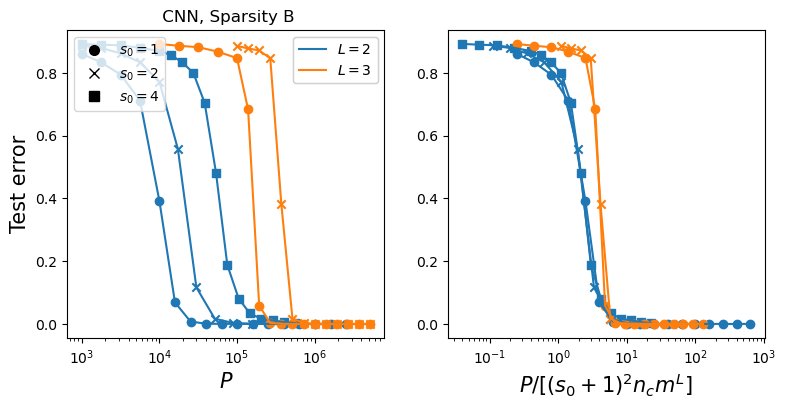

In [3]:
#different s
#MAX CASE
n=10


###### L=3 ########
#NO WHITENING
choice = "best"
type_diffeo = 'B'
q=0


width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,2, figsize = (9,4))
s0s = [1,2,4] #,2,4,6

Ls=[2,3]
sss = [2]
colors = cm.rainbow(np.linspace(0, 1, len(sss)))
for (idxL,L) in enumerate(Ls):
    #print(L)
    lss = '-'
    if L==2: col = 'C0'#lss = '--'
    elif L==3: col = 'C1' #lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        #print(s0)

        
        for (idxs,s) in enumerate(sss):
            #col = 'C0'#colors[idxs]
            m= n**(s-1)
             
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                lr = choice_lr(net,s,s0,L)

                accs_cnn = []
                    
                xx = training_point(net,s,s0,L,n,m)
                
                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            if s>222:
                                print('s:' +str(s))
                                print('s0:' +str(s0))
                                print('L:' +str(L))
                                print(tmp['train loss'][-1])
                            if tmp['train loss'][-1]<0.02:
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                if s>2:
                    axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error",size = 15)
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='C0', marker=None, linestyle='-',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='C1', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s00 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
#axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################


###### L=3 ########
#NO WHITENING

nets =["cnn2"]


for (idxL,L) in enumerate(Ls):
    #print('L: '+str(L))
    
    lss = '-'
    if L==2: col = 'C0'#lss = '--'
    elif L==3: col = 'C1' #lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
        
    for (idx_s0,s0) in enumerate(s0s):
        #print('s0: '+str(s0))

        
        for (idxs,s) in enumerate(sss):
            #col = 'C0'#colors[idxs]
            m = n**(s-1)
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" CNN, Sparsity B")
                lr = choice_lr(net,s,s0,L)

                
                accs_cnn = []  
                xx = training_point(net,s,s0,L,n,m)

                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            
                            
                            if tmp['train loss'][-1]<0.02:
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                 
                if idxnet==10:

                    fac_m = n*m**(L)
                    facs = (s0+1)**L
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^L v^{L+1}]$",size = 15)
                if idxnet==0:

                    fac_m = n*m**(L)
                    facs = (s0+1)**2
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^2 n_c m^{L}]$",size = 15)    
                

                if s>2:
                    axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col) 
                        
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[idxnet+1].scatter(xx_new *n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n ,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                
                axs[idxnet+1].set_xscale("log")
                
        
plt.savefig("figures/sparsityB_cnn.pdf", bbox_inches='tight')
plt.savefig("figures/sparsityB_cnn.png", bbox_inches='tight')


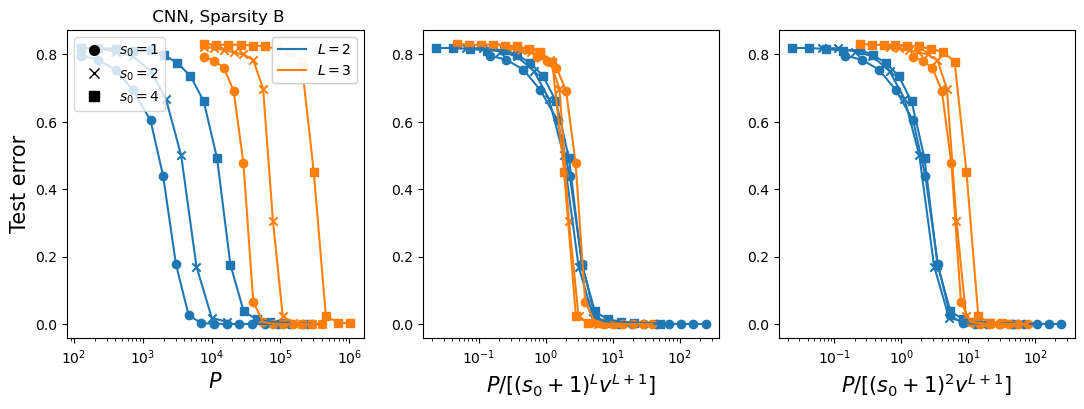

In [18]:
#different s
#MAX CASE
n=6


###### L=3 ########
#NO WHITENING
choice = "best"
type_diffeo = 'B'
q=0


width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,3, figsize = (13,4))
s0s = [1,2,4] #,2,4,6

Ls=[2,3]
sss = [2]
colors = cm.rainbow(np.linspace(0, 1, len(sss)))
for (idxL,L) in enumerate(Ls):
    #print(L)
    lss = '-'
    if L==2: col = 'C0'#lss = '--'
    elif L==3: col = 'C1' #lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        #print(s0)

        
        for (idxs,s) in enumerate(sss):
            #col = 'C0'#colors[idxs]
            m= n**(s-1)
             
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                lr = choice_lr(net,s,s0,L)

                accs_cnn = []
                    
                xx = training_point(net,s,s0,L,n,m)
                
                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            if s>222:
                                print('s:' +str(s))
                                print('s0:' +str(s0))
                                print('L:' +str(L))
                                print(tmp['train loss'][-1])
                            if tmp['train loss'][-1]<0.02:
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                if s>2:
                    axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error",size = 15)
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='C0', marker=None, linestyle='-',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='C1', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s00 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
#axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################


###### L=3 ########
#NO WHITENING

nets =["cnn2","cnn2"]


for (idxL,L) in enumerate(Ls):
    #print('L: '+str(L))
    
    lss = '-'
    if L==2: col = 'C0'#lss = '--'
    elif L==3: col = 'C1' #lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
        
    for (idx_s0,s0) in enumerate(s0s):
        #print('s0: '+str(s0))

        
        for (idxs,s) in enumerate(sss):
            #col = 'C0'#colors[idxs]
            m = n**(s-1)
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" CNN, Sparsity B")
                lr = choice_lr(net,s,s0,L)

                
                accs_cnn = []  
                xx = training_point(net,s,s0,L,n,m)

                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            
                            
                            if tmp['train loss'][-1]<0.02:
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                 
                if idxnet==0:

                    fac_m = n*m**(L)
                    facs = (s0+1)**L
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^L v^{L+1}]$",size = 15)
                if idxnet==1:

                    fac_m = n*m**(L)
                    facs = (s0+1)**2
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^2 v^{L+1}]$",size = 15)    
                

                if s>2:
                    axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col) 
                        
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[idxnet+1].scatter(xx_new *n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n ,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                
                axs[idxnet+1].set_xscale("log")
                
        
plt.savefig("figures/sparsityB_cnn.pdf", bbox_inches='tight')
plt.savefig("figures/sparsityB_cnn.png", bbox_inches='tight')


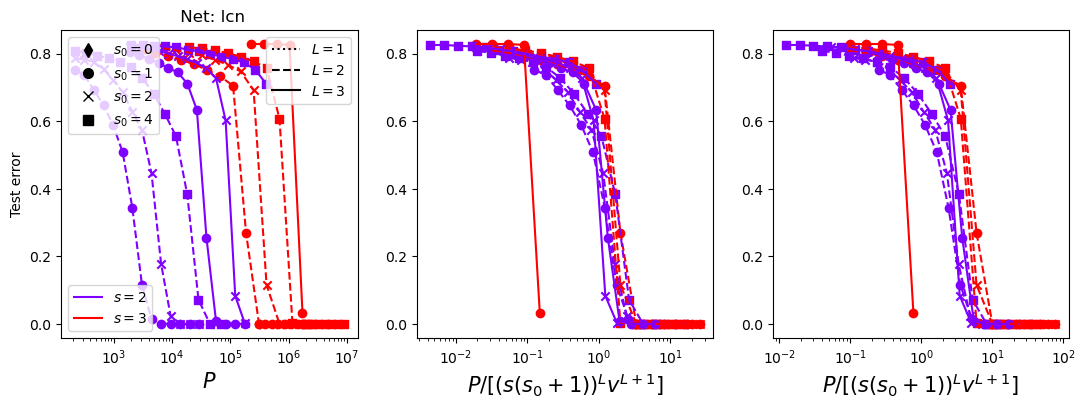

In [32]:
#different s
#MAX CASE
n=6


###### L=3 ########
#NO WHITENING
choice = "best"
type_diffeo = 'A'
q=0


width = 512
seed = 0
nets =["lcn"]#i

fig, axs = plt.subplots(1,3, figsize = (13,4))
s0s = [1,2,4] #,2,4,6

Ls=[2,3]
sss = [2,3]
colors = cm.rainbow(np.linspace(0, 1, len(sss)))
for (idxL,L) in enumerate(Ls):
    #print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        #print(s0)

        
        for (idxs,s) in enumerate(sss):
            col = colors[idxs]
            m= n**(s-1)
             
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                lr = choice_lr(net,s,s0,L)

                accs_cnn = []
                    
                xx = training_point(net,s,s0,L,n,m)
                
                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            if s>222:
                                print('s:' +str(s))
                                print('s0:' +str(s0))
                                print('L:' +str(L))
                                print(tmp['train loss'][-1])
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                            
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                if s>2:
                    axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s00 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s00,s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################


###### L=3 ########
#NO WHITENING

nets =["lcn","lcn"]


for (idxL,L) in enumerate(Ls):
    #print('L: '+str(L))
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        #print('s0: '+str(s0))

        
        for (idxs,s) in enumerate(sss):
            col = colors[idxs]
            m = n**(s-1)
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                lr = choice_lr(net,s,s0,L)

                
                accs_cnn = []  
                xx = training_point(net,s,s0,L,n,m)

                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr,q=q,type_diffeo=type_diffeo)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr,q=q,type_diffeo=type_diffeo)
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            if tmp['train loss'][-1] <1001:
                                num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                 
                if idxnet==0:

                    fac_m = n*m**(L)
                    if s==3:
                        facs = (1/6)*((s0**2)*(s0+3)*(s**3)-3*(s0-3)*s0*(s**2)+(6-16*s0)*s-12)
                        facs = facs/((1/2)*(s*s0+1)*(s*s0+2*s-4))
                        facs = facs**L
                        #print(facs)
                        #print((s0+1)**L)
                    elif s==2:
                        facs = (0.5*s0*(s0+2)*s**2 - 0.5*s0*s +s-1)
                        facs = facs/(s*(s0+1)-1)
                        facs = facs**L
                        #print(facs)
                        #print((s0+1)**L)
                    #print(s,L)
                    #print(facs)
                    facs = facs*(s**(L/2))
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s(s_0+1))^L v^{L+1}]$",size = 15)
                    
                if idxnet==1:

                    fac_m = n*m**(L)
                    if s==3:
                        facs = (1/6)*((s0**2)*(s0+3)*(s**3)-3*(s0-3)*s0*(s**2)+(6-16*s0)*s-12)
                        facs = facs/((1/2)*(s*s0+1)*(s*s0+2*s-4))
                        facs = facs**L
                        #print(facs)
                        #print((s0+1)**L)
                    elif s==2:
                        facs = (0.5*s0*(s0+2)*s**2 - 0.5*s0*s +s-1)
                        facs = facs/(s*(s0+1)-1)
                        facs = facs**L
                        #print(facs)
                        #print((s0+1)**L)
                    #print(s,L)
                    #print(facs)
                    #facs = facs*(s**(L/2))
                    xx_new  = xx_new /(fac_m*facs)

                    axs[idxnet+1].set_xlabel(r"$P/[(s(s_0+1))^L v^{L+1}]$",size = 15)
                    
                elif idxnet==2:

                    fac_m = n*m**(L)
                    xx_new  = xx_new /(fac_m*(s0+1)**(L))

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^2 v^{L+1}]$",size = 15)

                if s>2:
                    axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col) 
                        
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[idxnet+1].scatter(xx_new *n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[idxnet+1].scatter(xx_new *n,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                
                axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')


In [ ]:
#different s
#MAX CASE
n=4


###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [0,1,2,4] #,2,4,6

Ls=[2,3]
sss = [3]
colors = cm.rainbow(np.linspace(0, 1, len(sss)))
for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxs,s) in enumerate(sss):
            col = colors[idxs]
            m= n**(s-1)
            
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                lr = choice_lr(net,s,s0,L,n)

                accs_cnn = []
                    
                xx = training_point(net,s,s0,L,n,m)

                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                if s>2:
                    axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[0].plot(xx_new,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[0].plot(xx_new*n,accs_cnn,ls=lss,color = col)
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[0].scatter(xx_new,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[0].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s00 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s00,s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################


###### L=3 ########
#NO WHITENING

nets =["cnn2","cnn2","cnn2"]#


for (idxL,L) in enumerate(Ls):
    print('L: '+str(L))
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print('s0: '+str(s0))

        
        for (idxs,s) in enumerate(sss):
            col = colors[idxs]
            m = n**(s-1)
            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                lr = choice_lr(net,s,s0,L,n)

                
                accs_cnn = []  
                xx = training_point(net,s,s0,L,n,m)

                xx_new = training_point_new(xx,net,n,m,L,s0,s,width,lr)

                for ptrx in xx_new:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                        try:
                            tmp = load_net(net,ptr,n,m,L,s0,s,seed,width,lr)
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)

                 
                if idxnet==0:

                    fac_m = n*m**(L)
                    xx_new  = xx_new /(fac_m*(s0+1)**(s))

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^s v^{L+1}]$",size = 15)
                elif idxnet==1:
                    fac_m = n*m**(L)
                    xx_new  = s*xx_new /(fac_m*(s0+1)**(2))

                    axs[idxnet+1].set_xlabel(r"$P/[\frac{(s_0+1)^2}{s} v^{L+1}]$",size = 15)
                elif idxnet==2:

                    fac_m = n*m**(L)
                    xx_new  = xx_new /(fac_m*(s0+1)**(2))

                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^2 v^{L+1}]$",size = 15)

                if s>2:
                    axs[idxnet+1].plot(xx_new*n,accs_cnn,ls=lss,color = col)  
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)  
                    if L==2 and s0>0:
                        axs[idxnet+1].plot(xx_new ,accs_cnn,ls=lss,color = col)  
                    if L>1 and s0==0:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col)
                    if L==1:
                        axs[idxnet+1].plot(xx_new *n,accs_cnn,ls=lss,color = col) 
                        
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if s>2:
                    axs[idxnet+1].scatter(xx_new *n,accs_cnn,marker = mar,color = col) 
                else:
                    if L>=3 and s0>0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==2 and s0>0:
                        axs[idxnet+1].scatter(xx_new ,accs_cnn,marker = mar,color = col)   
                    if L>1 and s0==0:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                    if L==1:
                        axs[idxnet+1].scatter(xx_new*n,accs_cnn,marker = mar,color = col) 
                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                
                axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

2
0
19821 cnn2 4 16 2 0 3 512 0.003
25600 cnn2 4 16 2 0 3 512 0.003
1
51199 cnn2 4 16 2 1 3 512 0.003
2
7680 cnn2 4 16 2 2 3 512 0.003
7680 cnn2 4 16 2 2 3 512 0.003
76799 cnn2 4 16 2 2 3 512 0.003
4
128000 cnn2 4 16 2 4 3 512 0.003
3
0
409599 cnn2 4 16 3 0 3 512 0.003
1
819199 cnn2 4 16 3 1 3 512 0.003
2
951415 cnn2 4 16 3 2 3 512 0.003
1228800 cnn2 4 16 3 2 3 512 0.003
4
341626 cnn2 4 16 3 4 3 512 0.003
441228 cnn2 4 16 3 4 3 512 0.003
569868 cnn2 4 16 3 4 3 512 0.003
736013 cnn2 4 16 3 4 3 512 0.003
950597 cnn2 4 16 3 4 3 512 0.003
1227743 cnn2 4 16 3 4 3 512 0.003
1585692 cnn2 4 16 3 4 3 512 0.003
2047999 cnn2 4 16 3 4 3 512 0.003
L: 2
s0: 0
19821 cnn2 4 16 2 0 3 512 0.003
25600 cnn2 4 16 2 0 3 512 0.003
